In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # for 3D plots
import ipywidgets as widgets              # for interactivity
from ipywidgets import interact

**Function to Draw Vectors**

In [82]:
def plot_vectors(vectors, colors=None):
    """
    Plot 3D vectors from the origin (0,0,0).
    vectors: list of numpy arrays
    colors: list of colors for each vector
    """
    fig = plt.figure(figsize=(6,6))                # make square graph
    ax = fig.add_subplot(111, projection='3d')     # 3D axis

    # Default colors if none given
    if colors is None:
        colors = ['r', 'b', 'g', 'y']

    # Draw each vector as an arrow
    for vec, color in zip(vectors, colors):
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2],
                  color=color, arrow_length_ratio=0.1)

    # Set axis limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])

    # Axis labels
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")

    plt.show()

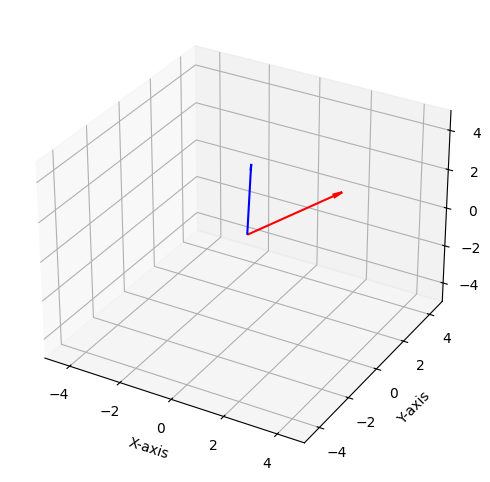

In [83]:
# Define two vectors
v1 = np.array([2, 3, 1])     # red vector
v2 = np.array([-1, 2, 2])    # blue vector

# Plot them
plot_vectors([v1, v2], ['red', 'blue'])

In [84]:
@interact(x=widgets.IntSlider(min=-100, max=100, step=1, value=2),
          y=widgets.IntSlider(min=-100, max=100, step=1, value=3),
          z=widgets.IntSlider(min=-100, max=100, step=1, value=1))
def update_vector(x, y, z):
    v = np.array([x, y, z])   # make a vector with chosen values
    plot_vectors([v], ['green'])

interactive(children=(IntSlider(value=2, description='x', min=-100), IntSlider(value=3, description='y', min=-…

**Subspaces**

In [85]:
def plot_line_span(v):
    """
    Show the span of a single vector (a line through origin).
    """
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the vector itself
    ax.quiver(0,0,0, v[0], v[1], v[2], color='red', arrow_length_ratio=0.1)

    # Draw the line (span = multiples of v)
    t = np.linspace(-5, 5, 50)  # 50 points between -5 and 5
    line = np.outer(t, v)       # all multiples of v
    ax.plot(line[:,0], line[:,1], line[:,2], 'b', alpha=0.6)

    # Axis setup
    ax.set_xlim([-5, 5]); ax.set_ylim([-5, 5]); ax.set_zlim([-5, 5])
    ax.set_xlabel("X-axis"); ax.set_ylabel("Y-axis"); ax.set_zlabel("Z-axis")
    plt.show()


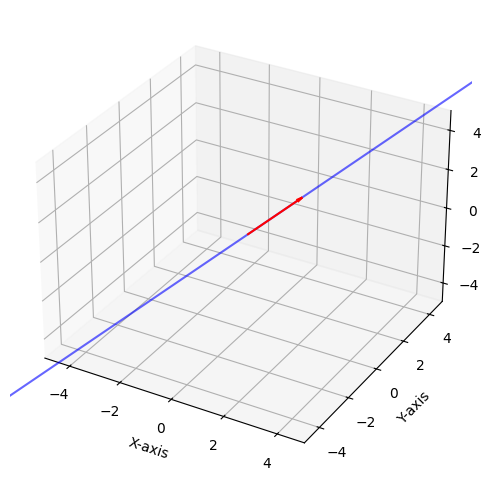

In [86]:
# Example: vector (1,2,1)
plot_line_span(np.array([1,2,1]))

In [87]:
def plot_plane_span(v1, v2):
    """
    Show the span of two vectors (a plane through origin if independent).
    """
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the two vectors
    plot_vectors([v1, v2], ['red', 'green'])

    # Create a grid of combinations (c1*v1 + c2*v2)
    c1 = np.linspace(-2, 2, 10)
    c2 = np.linspace(-2, 2, 10)
    C1, C2 = np.meshgrid(c1, c2)
    X = C1 * v1[0] + C2 * v2[0]
    Y = C1 * v1[1] + C2 * v2[1]
    Z = C1 * v1[2] + C2 * v2[2]

    # Plot surface (the span)
    ax.plot_surface(X, Y, Z, alpha=0.3, color='blue')

    # Axis setup
    ax.set_xlim([-5, 5]); ax.set_ylim([-5, 5]); ax.set_zlim([-5, 5])
    ax.set_xlabel("X-axis"); ax.set_ylabel("Y-axis"); ax.set_zlabel("Z-axis")
    plt.show()

In [88]:
def check_span_full(v1, v2, v3):
    """
    Check if three vectors span R^3.
    """
    M = np.column_stack([v1, v2, v3])  # make matrix with columns v1,v2,v3
    rank = np.linalg.matrix_rank(M)    # rank = dimension of span
    return rank

In [89]:
# Example: standard basis vectors
v1 = np.array([1,0,0])
v2 = np.array([0,1,0])
v3 = np.array([0,0,1])

print("Dimension of span =", check_span_full(v1, v2, v3))

Dimension of span = 3


**Linear Combination**

In [90]:
def linear_combination(v1, v2, c1, c2):
    """
    Show linear combination: c1*v1 + c2*v2
    """
    combo = c1*v1 + c2*v2

    print(f"Linear Combination = {c1}*{v1} + {c2}*{v2} = {combo}")

    # Plot original vectors + result
    plot_vectors([v1, v2, combo], ['red', 'blue', 'green'])




Linear Combination = 2*[1 2 0] + -1*[0 1 1] = [ 2  3 -1]


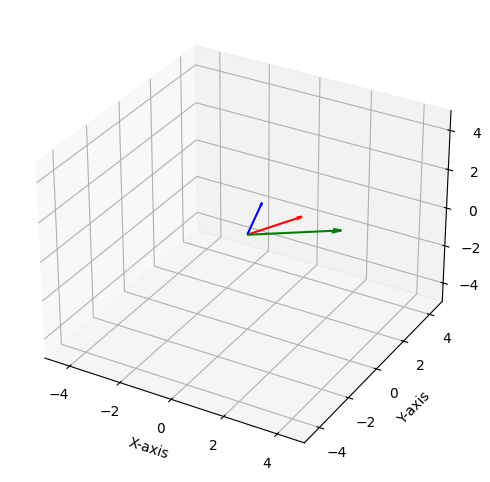

In [91]:
# Example: combine two vectors
v1 = np.array([1, 2, 0])
v2 = np.array([0, 1, 1])
linear_combination(v1, v2, 2, -1)

In [92]:
@interact(c1=(-50,50,50), c2=(-50,50,50))
def interactive_linear_combo(c1, c2):
    v1 = np.array([1, 2, 0])
    v2 = np.array([0, 1, 1])
    linear_combination(v1, v2, c1, c2)

interactive(children=(IntSlider(value=0, description='c1', max=50, min=-50, step=50), IntSlider(value=0, descr…

In [93]:
def visualize_span(v1, v2):
    """
    Show the span (plane) formed by v1 and v2.
    """
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    # Draw base vectors
    plot_vectors([v1, v2], ['red', 'blue'])

    # Create meshgrid of coefficients
    c1 = np.linspace(-2, 2, 10)
    c2 = np.linspace(-2, 2, 10)
    C1, C2 = np.meshgrid(c1, c2)
    X = C1*v1[0] + C2*v2[0]
    Y = C1*v1[1] + C2*v2[1]
    Z = C1*v1[2] + C2*v2[2]

    # Draw span as a surface
    ax.plot_surface(X, Y, Z, alpha=0.3, color='green')

    # Axes
    ax.set_xlim([-5,5]); ax.set_ylim([-5,5]); ax.set_zlim([-5,5])
    ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
    plt.show()

**Linear Independence / Dependence**

In [94]:
def check_linear_independence(v1, v2):
    """
    Check if two vectors are linearly independent.
    """
    M = np.column_stack([v1, v2])   # matrix with v1,v2 as columns
    rank = np.linalg.matrix_rank(M) # rank tells dimension of span

    if rank == 2:
        print("✅ The vectors are Linearly Independent (they span a plane).")
    else:
        print("❌ The vectors are Linearly Dependent (they lie on the same line).")

    # Plot them
    plot_vectors([v1, v2], ['red', 'blue'])

✅ The vectors are Linearly Independent (they span a plane).


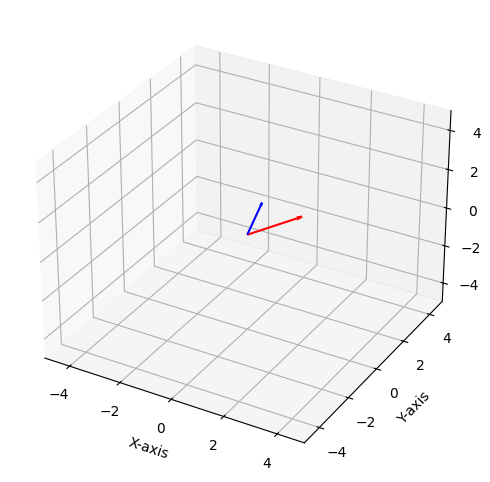

❌ The vectors are Linearly Dependent (they lie on the same line).


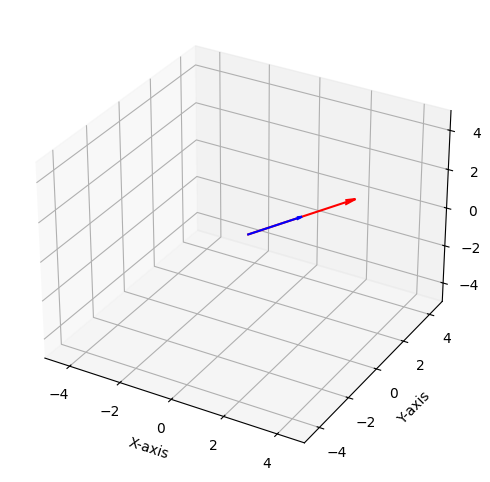

In [95]:
# Example 1: Independent vectors
v1 = np.array([1,2,0])
v2 = np.array([0,1,1])
check_linear_independence(v1, v2)

# Example 2: Dependent vectors
v3 = np.array([2,4,0])
v4 = np.array([1,2,0])
check_linear_independence(v3, v4)

In [96]:
def check_linear_independence_three(v1, v2, v3):
    """
    Check if three vectors are LI or LD.
    """
    M = np.column_stack([v1, v2, v3])  # make matrix with v1,v2,v3
    rank = np.linalg.matrix_rank(M)

    if rank == 3:
        print("✅ The vectors are Linearly Independent (span = full 3D space).")
    elif rank == 2:
        print("❌ The vectors are Dependent (they span only a plane).")
    else:
        print("❌ The vectors are Dependent (they lie on a line).")

    # Plot them
    plot_vectors([v1, v2, v3], ['red', 'blue', 'green'])




✅ The vectors are Linearly Independent (span = full 3D space).


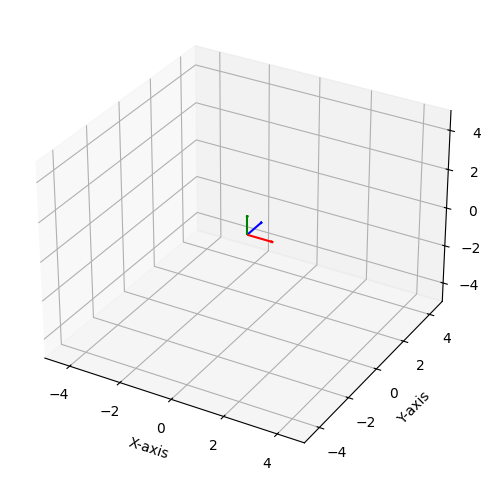

In [97]:
# Example
v1 = np.array([1,0,0])
v2 = np.array([0,1,0])
v3 = np.array([0,0,1])
check_linear_independence_three(v1, v2, v3)

In [98]:
@interact(x1=(-3,3,1), y1=(-3,3,1), z1=(-3,3,1),
          x2=(-3,3,1), y2=(-3,3,1), z2=(-3,3,1))
def interactive_LI(x1, y1, z1, x2, y2, z2):
    v1 = np.array([x1, y1, z1])
    v2 = np.array([x2, y2, z2])

    check_linear_independence(v1, v2)

interactive(children=(IntSlider(value=0, description='x1', max=3, min=-3), IntSlider(value=0, description='y1'…

**Check if a Set of Vectors is a Basis**

Standard basis vectors in R^3:
e1 = [1 0 0]
e2 = [0 1 0]
e3 = [0 0 1]


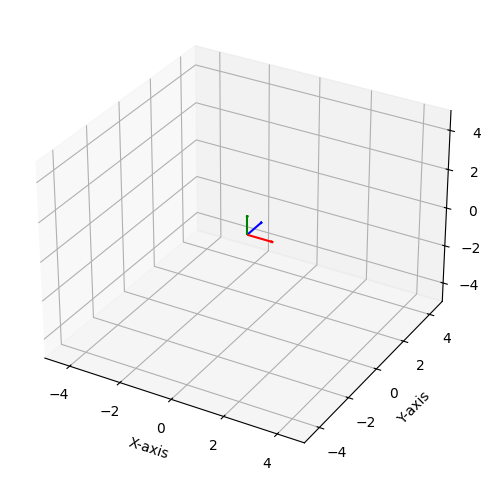

In [99]:
def plot_standard_basis():
    """
    Show standard basis vectors in R^3: e1, e2, e3
    """
    e1 = np.array([1,0,0])
    e2 = np.array([0,1,0])
    e3 = np.array([0,0,1])

    print("Standard basis vectors in R^3:")
    print("e1 =", e1)
    print("e2 =", e2)
    print("e3 =", e3)

    plot_vectors([e1, e2, e3], ['red', 'blue', 'green'])

plot_standard_basis()

In [100]:
def is_basis(vectors):
    """
    Check if given vectors form a basis of R^n.
    """
    M = np.column_stack(vectors)      # make matrix with given vectors
    rank = np.linalg.matrix_rank(M)   # rank = number of independent vectors
    n = M.shape[0]                    # dimension of space (rows)

    if rank == len(vectors) == n:
        print("✅ These vectors form a BASIS of R^", n)
    else:
        print("❌ These vectors do NOT form a basis.")



In [101]:
# Example 1: Standard basis in R^3
v1 = np.array([1,0,0])
v2 = np.array([0,1,0])
v3 = np.array([0,0,1])
is_basis([v1, v2, v3])

# Example 2: Dependent vectors
u1 = np.array([1,2,3])
u2 = np.array([2,4,6])  # multiple of u1
u3 = np.array([0,1,0])
is_basis([u1, u2, u3])

✅ These vectors form a BASIS of R^ 3
❌ These vectors do NOT form a basis.


**Dimension = Number of Independent Vectors**

In [102]:
def dimension_of_span(vectors):
    """
    Find the dimension of span of given vectors.
    """
    M = np.column_stack(vectors)
    rank = np.linalg.matrix_rank(M)
    print("Dimension of span =", rank)

In [103]:
# Example
a = np.array([1,2,0])
b = np.array([0,1,1])
c = np.array([2,4,0])  # multiple of a

dimension_of_span([a, b, c])

Dimension of span = 2


**Vector Addition**

In [104]:
def plot_vector_addition(u, v):
    """
    Show vector addition u + v in 3D
    """
    u = np.array(u)
    v = np.array(v)
    uv = u + v

    print("u =", u)
    print("v =", v)
    print("u + v =", uv)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot u, v, and u+v
    ax.quiver(0,0,0, *u, color='red', label='u')
    ax.quiver(0,0,0, *v, color='blue', label='v')
    ax.quiver(0,0,0, *uv, color='green', label='u+v')

    ax.set_xlim([0, max(u[0], v[0], uv[0])+1])
    ax.set_ylim([0, max(u[1], v[1], uv[1])+1])
    ax.set_zlim([0, max(u[2], v[2], uv[2])+1])
    ax.legend()
    plt.show()


**Dot Product & Projection**

In [105]:
def plot_dot_product(u, v):
    """
    Show dot product as projection of u on v
    """
    u = np.array(u)
    v = np.array(v)

    dot = np.dot(u, v)
    proj_length = dot / np.linalg.norm(v)   # projection length
    proj = (proj_length / np.linalg.norm(v)) * v  # projection vector

    print("u · v =", dot)
    print("Projection of u on v =", proj)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver(0,0,0, *u, color='red', label='u')
    ax.quiver(0,0,0, *v, color='blue', label='v')
    ax.quiver(0,0,0, *proj, color='green', linestyle="--", label='Projection of u on v')

    ax.legend()
    plt.show()

**Cross Product**

In [106]:
def plot_cross_product(u, v):
    """
    Show cross product u × v in 3D
    """
    u = np.array(u)
    v = np.array(v)
    cross = np.cross(u, v)

    print("u × v =", cross)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver(0,0,0, *u, color='red', label='u')
    ax.quiver(0,0,0, *v, color='blue', label='v')
    ax.quiver(0,0,0, *cross, color='green', label='u × v')

    ax.legend()
    plt.show()

# Matrix Operations

In [107]:
#Matrix × Vector (Linear Transformation)
def matrix_vector_mult(A, v):
    """
    Multiply matrix A with vector v (linear transformation)
    """
    A = np.array(A)
    v = np.array(v)

    result = A @ v
    print("Matrix A:\n", A)
    print("Vector v:", v)
    print("A * v =", result)
    return result

In [108]:
#Matrix × Matrix (Composition of Transformations)
def matrix_matrix_mult(A, B):
    """
    Multiply matrix A with matrix B (composition of transformations)
    """
    A = np.array(A)
    B = np.array(B)

    result = A @ B
    print("Matrix A:\n", A)
    print("Matrix B:\n", B)
    print("A * B =\n", result)
    return result

In [109]:
#Determinant (Area/Volume Scaling)
def determinant(A):
    """
    Calculate determinant of matrix A
    """
    A = np.array(A)
    det = np.linalg.det(A)
    print("Matrix A:\n", A)
    print("det(A) =", det)
    return det

In [110]:
#Rank of a Matrix
def rank_matrix(A):
    """
    Find rank of matrix A
    """
    A = np.array(A)
    rank = np.linalg.matrix_rank(A)
    print("Matrix A:\n", A)
    print("Rank =", rank)
    return rank

In [111]:
#Inverse of a Matrix
def inverse_matrix(A):
    """
    Find inverse of matrix A
    """
    A = np.array(A)
    try:
        inv = np.linalg.inv(A)
        print("Matrix A:\n", A)
        print("Inverse of A:\n", inv)
        return inv
    except np.linalg.LinAlgError:
        print("Matrix A is singular (no inverse)")
        return None

# mart Agent with LangChain & OpenAI

In [1]:
!pip install langchain langchain-openai

In [2]:
import numpy as np
from langchain.tools import tool
from langchain_openai import ChatOpenAI
from langchain.agents import initialize_agent, AgentType

In [3]:
# 3. Define tools
# ===============================

@tool
def vector_add(u: list[float], v: list[float]) -> list[float]:
    """Add two vectors u and v."""
    return (np.add(u, v)).tolist()

@tool
def scalar_multiply(c: float, v: list[float]) -> list[float]:
    """Multiply vector v by scalar c."""
    return (np.multiply(c, v)).tolist()

@tool
def dot_product(u: list[float], v: list[float]) -> float:
    """Compute dot product of u and v."""
    return float(np.dot(u, v))

@tool
def cross_product(u: list[float], v: list[float]) -> list[float]:
    """Compute cross product of u and v."""
    return np.cross(u, v).tolist()

@tool
def determinant(A: list[list[float]]) -> float:
    """Compute determinant of matrix A."""
    return float(np.linalg.det(A))

@tool
def inverse(A: list[list[float]]) -> list[list[float]]:
    """Compute inverse of matrix A."""
    return np.linalg.inv(A).tolist()

@tool
def transpose(A: list[list[float]]) -> list[list[float]]:
    """Compute transpose of matrix A."""
    return np.transpose(A).tolist()

@tool
def rank(A: list[list[float]]) -> int:
    """Compute rank of matrix A."""
    return int(np.linalg.matrix_rank(A))

@tool
def linear_combination(coeffs: list[float], vectors: list[list[float]]) -> list[float]:
    """Compute linear combination: coeffs[i] * vectors[i]."""
    result = np.zeros(len(vectors[0]))
    for c, v in zip(coeffs, vectors):
        result += c * np.array(v)
    return result.tolist()

@tool
def is_linearly_independent(vectors: list[list[float]]) -> bool:
    """Check if vectors are linearly independent."""
    A = np.array(vectors).T
    return np.linalg.matrix_rank(A) == len(vectors)

@tool
def span_dimension(vectors: list[list[float]]) -> int:
    """Find dimension of the span of given vectors."""
    A = np.array(vectors).T
    return np.linalg.matrix_rank(A)

In [4]:
# Collect tools

tools = [
    vector_add, scalar_multiply, dot_product, cross_product,
    determinant, inverse, transpose, rank,
    linear_combination, is_linearly_independent, span_dimension
]

In [11]:
import os
os.environ["OPENAI_API_KEY"] = "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"

In [14]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.OPENAI_FUNCTIONS,  # ✅ best for multi-input tools
    verbose=True
)

In [13]:
while True:
    query = input("Ask about vectors/matrices (or type 'exit'): ")
    if query.lower() == "exit":
        break
    result = agent.invoke(query)   # ✅ use invoke (run is deprecated)
    print("Answer:", result)

Ask about vectors/matrices (or type 'exit'): Determinant of [[1,2],[3,4]]


> Entering new AgentExecutor chain...


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-or-v1*************************************************************c323. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}